<a href="https://colab.research.google.com/github/sjin0911/25Miniproject1-Ensemble/blob/main/MWFormer/MWF_Inf_Ens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
REPO_URL="https://github.com/sjin0911/25Miniproject1-Ensemble"
WORKDIR="/content/25Miniproject1-Ensemble/"

# 1) 기존 폴더 삭제 후 새로 클론
!rm -rf "$WORKDIR"
!git clone --depth 1 "$REPO_URL" "$WORKDIR"

# 2) Colab 환경에서 디렉토리 이동 (持續적 적용)
%cd "$WORKDIR"

# 3) 정상적으로 git repo 인식되는지 확인
!git status
!git remote -v

Cloning into '/content/25Miniproject1-Ensemble'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 71 (delta 1), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 3.63 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/25Miniproject1-Ensemble
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
origin	https://github.com/sjin0911/25Miniproject1-Ensemble (fetch)
origin	https://github.com/sjin0911/25Miniproject1-Ensemble (push)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

DRIVE_OUT = "/content/drive/MyDrive/mwformer_out"

Mounted at /content/drive


In [3]:
# ===== 사용자가 미리 준비한 경로 =====
weights_root = "/content/drive/MyDrive/BOAZminiproject1/MWFormer_weights"

# MWFormer_real
backbone_real_path = f"{weights_root}/MWFormer_real/backbone"
style_real_path    = f"{weights_root}/MWFormer_real/style_filter"

# MWFormer_L
backbone_L_path = f"{weights_root}/MWFormer_L/backbone"
style_L_path    = f"{weights_root}/MWFormer_L/style_filter"

# (옵션) pretrained_feature_extraction_network
feature_path = f"{weights_root}/pretrained_feature_extraction_network/style_filter.pth"

# 경로 확인
import os, glob
def ls_some(p):
    print(">>", p)
    if os.path.isdir(p):
        for x in sorted(glob.glob(os.path.join(p, "*")))[:5]:
            print("  ", os.path.basename(x))
    else:
        print("  (exists:", os.path.exists(p), ")")

ls_some(backbone_real_path)
ls_some(style_real_path)
ls_some(backbone_L_path)
ls_some(style_L_path)
ls_some(feature_path)

>> /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_real/backbone
  (exists: False )
>> /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_real/style_filter
  (exists: True )
>> /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_L/backbone
  (exists: True )
>> /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_L/style_filter
  (exists: True )
>> /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/pretrained_feature_extraction_network/style_filter.pth
  (exists: True )


In [4]:
# real
BACKBONE_PTH="/content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_real/backbone.pth"
STYLE_PTH="/content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_real/style_filter.pth"

In [ ]:
# L
BACKBONE_PTH="/content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_L/backbone.pth"
STYLE_PTH="/content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_L/style_filter.pth"

In [5]:
# 인퍼런스 실행 (GT 없이 복원만)
%cd /content/25Miniproject1-Ensemble/MWFormer
!python test.py \
  -restore-from-stylefilter "$STYLE_PTH" \
  -restore-from-backbone   "$BACKBONE_PTH" \
  --input_dir "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/input" \
  --save_dir  "/content/25Miniproject1-Ensemble/MWFormer/result" \
  --no_metrics

/content/25Miniproject1-Ensemble/MWFormer
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Seed:	19
Device: cuda
[load backbone]: /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_real/backbone.pth
[load style   ]: /content/drive/MyDrive/BOAZminiproject1/MWFormer_weights/MWFormer_real/style_filter.pth
--- Folder inference (no GT) starts! ---
✅ 복원 완료: 9개 → /content/25Miniproject1-Ensemble/MWFormer/result
⏱ elapsed: 33.47s  (avg 3.719s/img)


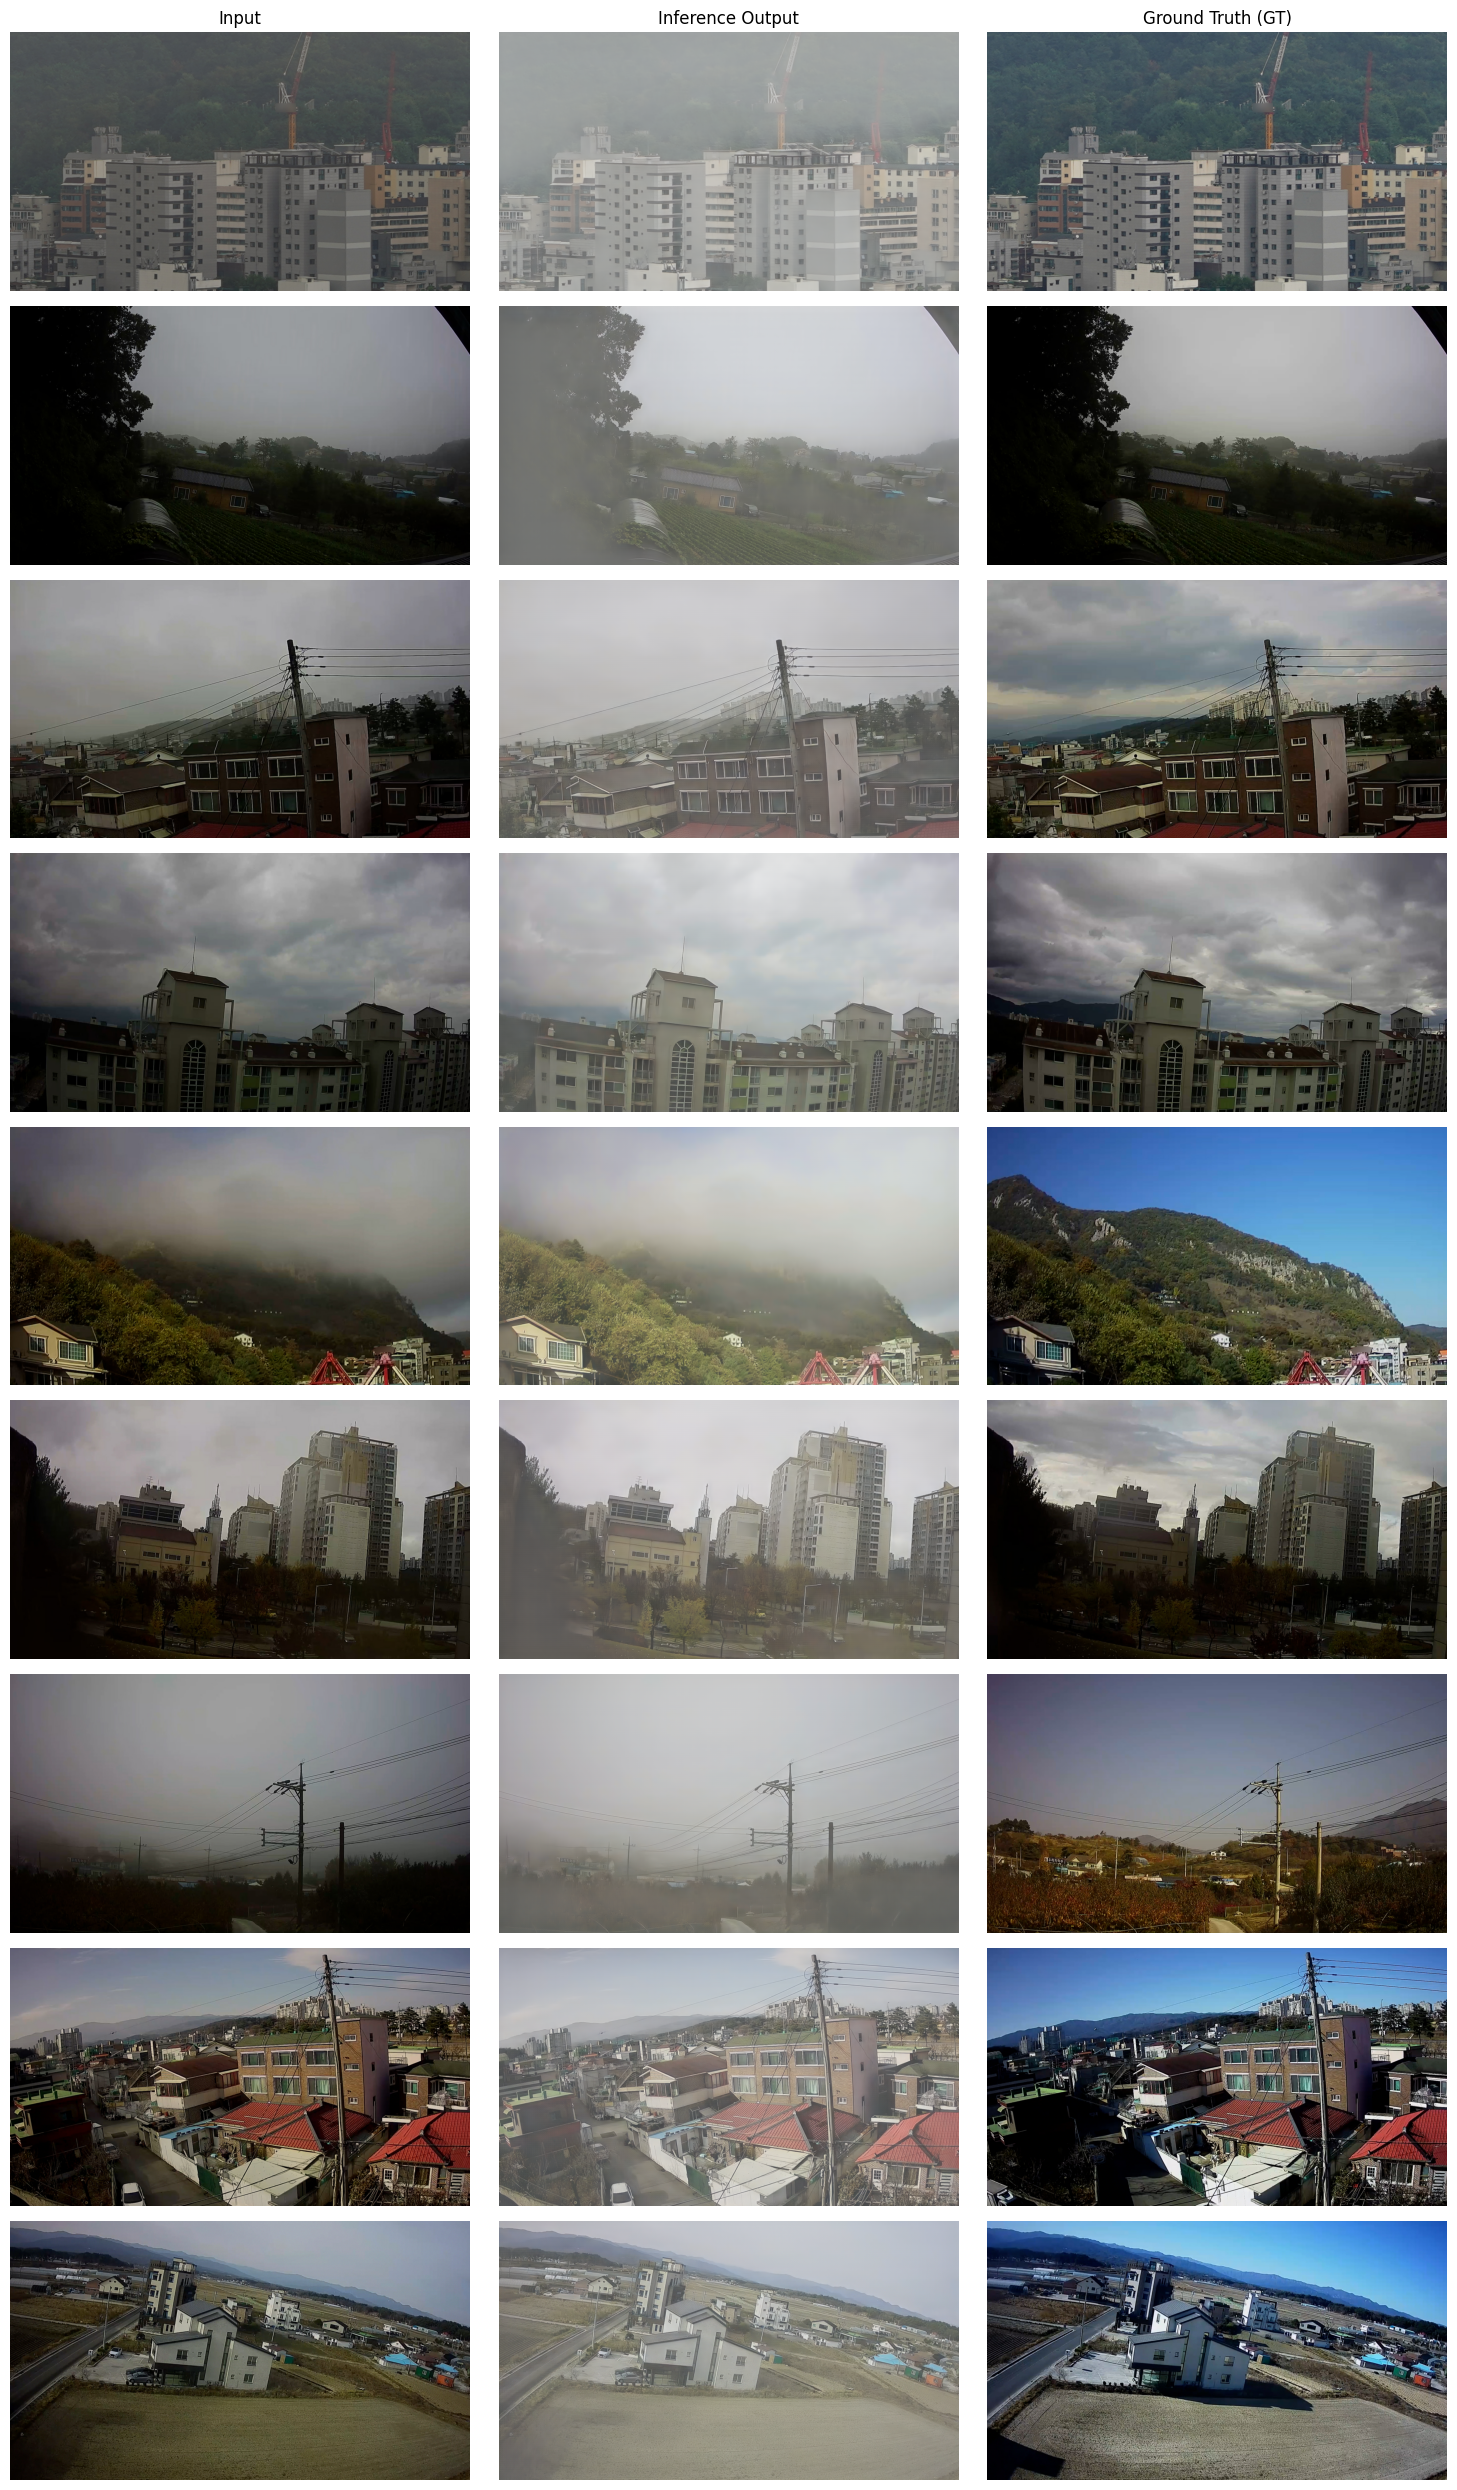

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_results(input_dir, output_dir, gt_dir):
    """
    주어진 폴더 경로에서 이미지들을 불러와 시각화합니다.

    Args:
        input_dir (str): 인풋 이미지가 있는 폴더 경로
        output_dir (str): 인퍼런스 아웃풋 이미지가 있는 폴더 경로
        gt_dir (str): GT (Ground Truth) 이미지가 있는 폴더 경로
    """

    # 각 폴더에 있는 파일 목록을 가져옵니다.
    input_files = sorted(os.listdir(input_dir))
    output_files = sorted(os.listdir(output_dir))
    gt_files = sorted(os.listdir(gt_dir))

    # 파일이 없는 경우 오류 메시지 출력
    if not input_files or not output_files or not gt_files:
        print("경로에 파일이 없습니다. 경로를 다시 확인해주세요.")
        print(f"인풋 폴더: {input_dir}, 파일 수: {len(input_files)}")
        print(f"아웃풋 폴더: {output_dir}, 파일 수: {len(output_files)}")
        print(f"GT 폴더: {gt_dir}, 파일 수: {len(gt_files)}")
        return

    # 인풋 파일명을 기준으로 시각화 순서를 정합니다.
    # 인풋/아웃풋/GT 파일명이 다르지만, 왼쪽 15자까지 같다는 전제하에 작동합니다.
    image_prefixes = [f[:15] for f in input_files]

    # 시각화할 이미지들을 저장할 딕셔너리
    images_to_show = {
        'input': [],
        'output': [],
        'gt': []
    }

    for prefix in image_prefixes:
        # 각 폴더에서 prefix가 일치하는 파일을 찾습니다.
        input_path = next((os.path.join(input_dir, f) for f in input_files if f.startswith(prefix)), None)
        output_path = next((os.path.join(output_dir, f) for f in output_files if f.startswith(prefix)), None)
        gt_path = next((os.path.join(gt_dir, f) for f in gt_files if f.startswith(prefix)), None)

        if input_path and output_path and gt_path:
            images_to_show['input'].append((input_path, prefix))
            images_to_show['output'].append((output_path, prefix))
            images_to_show['gt'].append((gt_path, prefix))
        else:
            print(f"경로에서 접두사 '{prefix}'에 해당하는 파일을 찾을 수 없습니다. 시각화를 건너뜁니다.")

    # 9x3 그리드 형태의 플롯 생성
    fig, axes = plt.subplots(nrows=len(images_to_show['input']), ncols=3, figsize=(15, 25))

    # 서브플롯 제목 설정
    column_titles = ['Input', 'Inference Output', 'Ground Truth (GT)']

    for i, prefix in enumerate(image_prefixes):
        # i번째 인풋, 아웃풋, GT 이미지 경로를 가져옵니다.
        input_path = images_to_show['input'][i][0]
        output_path = images_to_show['output'][i][0]
        gt_path = images_to_show['gt'][i][0]

        # 인풋 이미지
        try:
            img = mpimg.imread(input_path)
            axes[i, 0].imshow(img)
            axes[i, 0].set_ylabel(prefix, fontsize=8, rotation=0, ha='right')
            axes[i, 0].axis('off')
        except Exception as e:
            print(f"'{input_path}' 파일을 읽는 중 오류가 발생했습니다: {e}")
            axes[i, 0].set_title(f"Error loading Input")
            axes[i, 0].axis('off')

        # 아웃풋 이미지
        try:
            img = mpimg.imread(output_path)
            axes[i, 1].imshow(img)
            axes[i, 1].axis('off')
        except Exception as e:
            print(f"'{output_path}' 파일을 읽는 중 오류가 발생했습니다: {e}")
            axes[i, 1].set_title(f"Error loading Output")
            axes[i, 1].axis('off')

        # GT 이미지
        try:
            img = mpimg.imread(gt_path)
            axes[i, 2].imshow(img)
            axes[i, 2].axis('off')
        except Exception as e:
            print(f"'{gt_path}' 파일을 읽는 중 오류가 발생했습니다: {e}")
            axes[i, 2].set_title(f"Error loading GT")
            axes[i, 2].axis('off')

    # 맨 위의 제목 설정
    for j, title in enumerate(column_titles):
        axes[0, j].set_title(title)

    plt.tight_layout()
    plt.show()

# 함수 사용 예시
input_folder = "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/input"
output_folder = "/content/25Miniproject1-Ensemble/MWFormer/result"
gt_folder = "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/GT"

visualize_results(input_folder, output_folder, gt_folder)